In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.decomposition import PCA
warnings.simplefilter('ignore')
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)
import statsmodels.api as sm
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 의사결정나무


In [2]:
df_raw=pd.read_csv("/Users/lee/Week3/체질검사.csv",engine="python",encoding='cp949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


## (1) 데이터 구성하기 (목표변수, 설명변수)

In [3]:
df_raw_y=df_raw["FAT"]
df_raw_x=df_raw.drop("FAT",axis=1,inplace=False)

## (2) 데이터 분할하기

In [4]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X siez:{}".format(df_train_x.shape))
print("train data Y siez:{}".format(df_train_y.shape))
print("test data X siez:{}".format(df_test_x.shape))
print("test data Y siez:{}".format(df_test_y.shape))

tree_uncustomized=DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

train data X siez:(176, 13)
train data Y siez:(176,)
test data X siez:(76, 13)
test data Y siez:(76,)
Score on training set : 1.000
Score on test set : 0.345


## (3) Parameter = min_samples_leaf

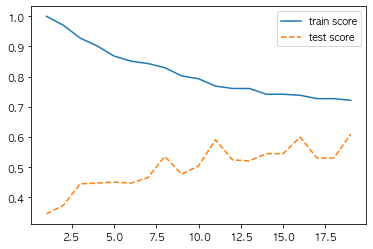

In [5]:
train_score=[]; test_score=[];
para_leaf=[n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
df_score_leaf=pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["Testscore"]=test_score

df_score_leaf.round(3)
plt.plot(para_leaf,train_score,linestyle='-',label='train score')
plt.plot(para_leaf,test_score,linestyle='--',label='test score')
plt.legend()

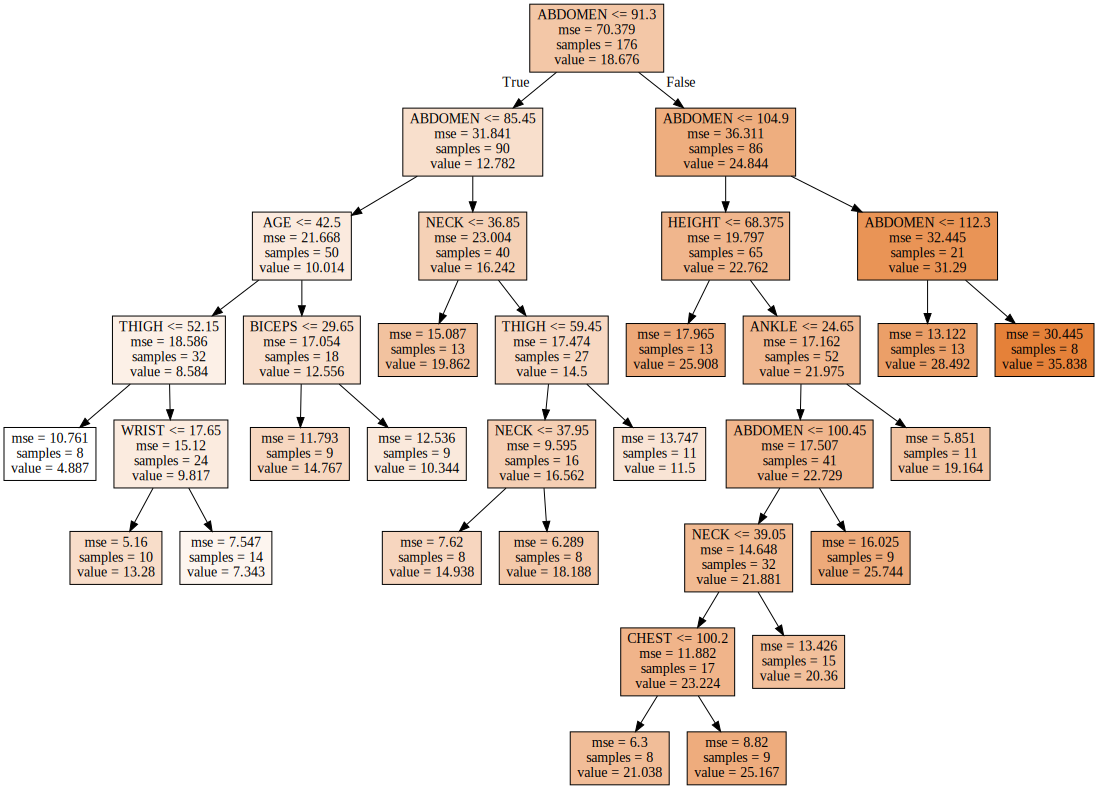

In [6]:
v_feature_name=df_train_x.columns
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_leaf.dot",feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_leaf.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

## (4) Parameter = min_samples_split

In [7]:
train_score=[];test_score=[];
para_split=[n_split * 2 for n_split in range(2,20)]

for v_min_saples_split in para_split:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=v_min_saples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
df_score_split=pd.DataFrame()
df_score_split["MinSamplesSplit"]=para_split
df_score_split["Trainscore"]=train_score
df_score_split["TestScore"]=test_score
df_score_split.round(3)

,MinSamplesSplit,Trainscore,TestScore
0,4,0.830,0.536
1,6,0.830,0.536
2,8,0.830,0.536
3,10,0.830,0.536
4,12,0.830,0.536
5,14,0.830,0.536
6,16,0.830,0.536
7,18,0.821,0.557
8,20,0.813,0.581
9,22,0.792,0.567


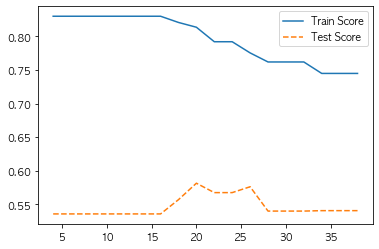

In [8]:
df_score_split.round(3)
plt.plot(para_split,train_score,linestyle='-',label="Train Score")
plt.plot(para_split,test_score,linestyle='--',label="Test Score")
plt.legend()

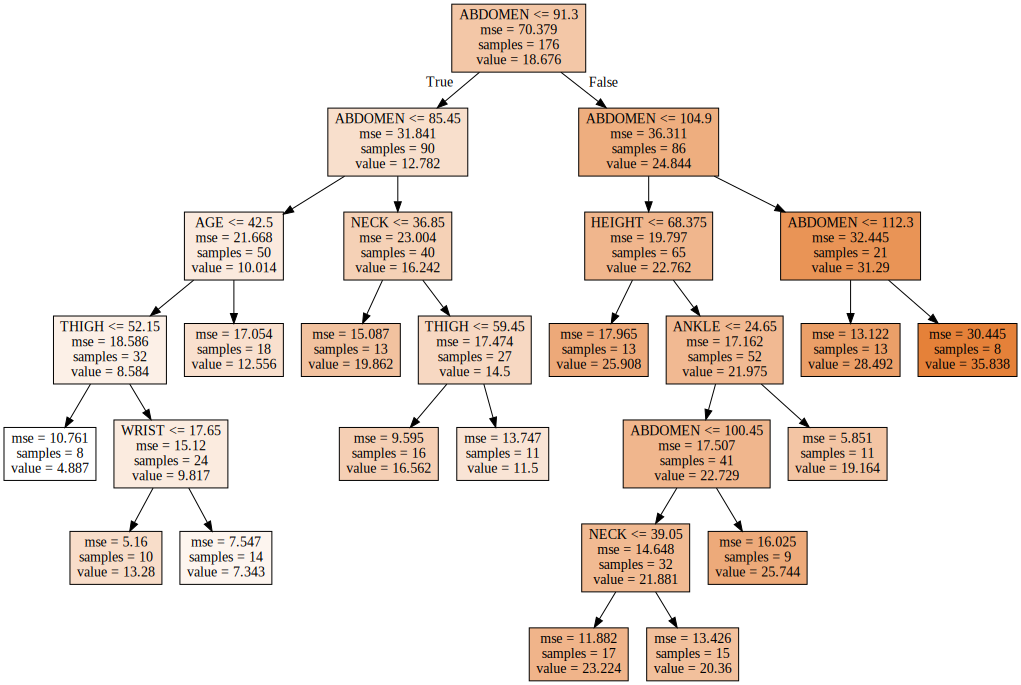

In [9]:
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=20)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_split.dot",feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_split.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

## (5) Parameter = max_depth

In [11]:
train_score=[];test_score=[];
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=20,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
df_score_depth=pd.DataFrame()
df_score_depth["depth"]=para_depth
df_score_depth["Trainscore"]=train_score
df_score_depth["TestScore"]=test_score
df_score_depth.round(3)

,depth,Trainscore,TestScore
0,1,0.517,0.333
1,2,0.679,0.569
2,3,0.749,0.538
3,4,0.783,0.570
4,5,0.808,0.581
5,6,0.813,0.581
6,7,0.813,0.581
7,8,0.813,0.581
8,9,0.813,0.581
9,10,0.813,0.581


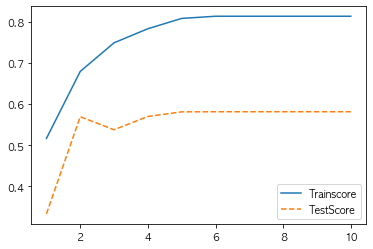

In [12]:
df_score_depth.round(3)
plt.plot(para_depth, train_score, linestyle='-',label="Trainscore")
plt.plot(para_depth, test_score, linestyle='--',label="TestScore")
plt.legend()

## (6) 최종모델선정

In [15]:
tree_final = DecisionTreeClassifier(min_samples_leaf=8,min_samples_split=20,max_depth=4,random_state=1234)
tree_final.fit(df_train_x,df_train_y)

export_graphviz(tree_final,out_file="tree_final.dot",feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

ValueError: Unknown label type: 'continuous'

## (7) 최종 모델 트리 시각화 및 해석

## (8) 설명변수 중요도

Text(0, 0.5, '설명변수')

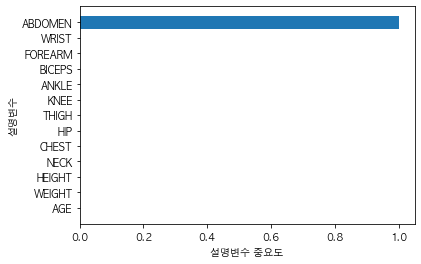

In [14]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=tree_final.feature_importances_

df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## (9) GridsearchCV 최적 Parameter 찾기

##

##

##

##

##